<a href="https://colab.research.google.com/github/rafayel404/Pandas/blob/main/Task_6_Pandas_S21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [2]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)
df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [26]:
df.unstack(level=0).stack(level=0).swaplevel(axis=1).swaplevel()

<ipython-input-26-4000a1c6dc5e>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.unstack(level=0).stack(level=0).swaplevel(axis=1).swaplevel()


,,cse,ece,cse,ece
,,avg_package,avg_package,students,students
delhi,2019,1,9,2,10
mumbai,2019,0,0,0,0
delhi,2020,3,11,4,12
mumbai,2020,0,0,0,0
delhi,2021,5,13,6,14
mumbai,2021,0,0,0,0
delhi,2022,7,15,8,16
mumbai,2022,0,0,0,0


###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [27]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [28]:
confirm.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812


In [29]:
deaths.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595


In [31]:
deaths = deaths.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [32]:
final_df = confirm.merge(deaths,on=['Province/State','Country/Region','Lat','Long','date'])
final_df

,Province/State,Country/Region,Lat,Long,date,num_cases,num_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [33]:
final_df.set_index(['Country/Region','Province/State'],inplace=True)
final_df

,,Lat,Long,date,num_cases,num_deaths
Country/Region,Province/State,,,,,
Afghanistan,NaN,33.939110,67.709953,1/22/20,0,0
Albania,NaN,41.153300,20.168300,1/22/20,0,0
Algeria,NaN,28.033900,1.659600,1/22/20,0,0
Andorra,NaN,42.506300,1.521800,1/22/20,0,0
Angola,NaN,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,1/2/23,703228,5708
Winter Olympics 2022,NaN,39.904200,116.407400,1/2/23,535,0
Yemen,NaN,15.552727,48.516388,1/2/23,11945,2159


###`Q-3:` Show Country with Heighest death percent out of confirmed Cases.

In [35]:
final_df

,,Lat,Long,date,num_cases,num_deaths
Country/Region,Province/State,,,,,
Afghanistan,NaN,33.939110,67.709953,1/22/20,0,0
Albania,NaN,41.153300,20.168300,1/22/20,0,0
Algeria,NaN,28.033900,1.659600,1/22/20,0,0
Andorra,NaN,42.506300,1.521800,1/22/20,0,0
Angola,NaN,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,1/2/23,703228,5708
Winter Olympics 2022,NaN,39.904200,116.407400,1/2/23,535,0
Yemen,NaN,15.552727,48.516388,1/2/23,11945,2159


In [37]:
df=final_df.reset_index().groupby('Country/Region')[['num_cases','num_deaths']].sum()
df

,num_cases,num_deaths
Country/Region,,
Afghanistan,116218938,4901323
Albania,163505982,2248012
Algeria,164830894,4447129
Andorra,21390392,116300
Angola,53083822,1104387
...,...,...
West Bank and Gaza,366130648,3377981
Winter Olympics 2022,179152,0
Yemen,7091065,1372952


In [40]:
df['percentage']=round((df.num_deaths/df.num_cases)*100,2)
df.sort_values('percentage',ascending=False)

,num_cases,num_deaths,percentage
Country/Region,,,
"Korea, North",234,1404,600.00
MS Zaandam,9071,2014,22.20
Yemen,7091065,1372952,19.36
Sudan,38729339,2850576,7.36
Peru,2203724423,156296296,7.09
...,...,...,...
Antarctica,4235,0,0.00
Holy See,24893,0,0.00
Summer Olympics 2020,441598,0,0.00


### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

In [41]:
 india_df = final_df.loc['India'].copy()
india_df['new_cases'] = india_df['num_cases'] - india_df['num_cases'].shift(1)
india_df

,Lat,Long,date,num_cases,num_deaths,new_cases
Province/State,,,,,,
NaN,20.593684,78.96288,1/22/20,0,0,NaN
NaN,20.593684,78.96288,1/23/20,0,0,0.0
NaN,20.593684,78.96288,1/24/20,0,0,0.0
NaN,20.593684,78.96288,1/25/20,0,0,0.0
NaN,20.593684,78.96288,1/26/20,0,0,0.0
...,...,...,...,...,...,...
NaN,20.593684,78.96288,12/29/22,44679382,530699,243.0
NaN,20.593684,78.96288,12/30/22,44679608,530702,226.0
NaN,20.593684,78.96288,12/31/22,44679873,530705,265.0


### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [42]:
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [45]:
df.drop(columns='Unnamed: 0',inplace=True)

In [49]:
#df.set_index(['Country','City/Town'],inplace=True)
df

Position  Year  PM2.5 Temporal coverage  PM10  \
Country     City/Town                                                     
India       Kanpur               1  2016    173              >75%   319   
            Faridabad            2  2016    172              >75%   316   
            Gaya                 3  2016    149        50% -< 75%   275   
            Varanasi             4  2016    146              >75%   260   
            Patna                5  2016    144              >75%   266   
...                            ...   ...    ...               ...   ...   
Poland      Lublin             496  2016     27              >75%    31   
            Siedlce            497  2016     27              >75%    29   
            Trzebinia          498  2016     27              >75%    35   
El Salvador San Salvador       499  2016     27        50% -< 75%    59   
Turkey      Sivas              500  2016     27              >75%    56   

                         Temporal coverage.1  Database version (year)  
Country     City/Town                                                  
India       Kanpur                       NaN                     2018  
            Faridabad                    NaN                     2018  
            Gaya                         NaN                     2018  
            Varanasi                     NaN                     2018  
            Patna                        NaN                     2018  
...                                      ...                      ...  
Poland      Lublin                      >75%                     2018  
            Siedlce                     >75%                     2018  
            Trzebinia                   >75%                     2018  
El Salvador San Salvador                 NaN                     2018  
Turkey      Sivas                       >75%                     2018  

[500 rows x 7 columns]

In [50]:
df.loc['India'].sort_values('PM10',ascending=False).head(1).index[0]

'Kanpur'

In [51]:
df.loc['India'].sort_values('PM10',ascending=False).tail(1).index[0]

'Aizawl'

In [52]:
df.loc['China'].sort_values('PM10',ascending=False).tail(1).index[0]

'Anshun'

<Axes: ylabel='PM10'>

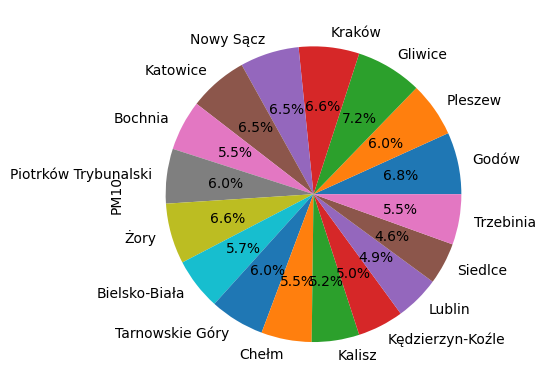

In [53]:
df.loc['Poland']['PM10'].plot(kind='pie',autopct="%0.1f%%")

<Axes: xlabel='Country,City/Town'>

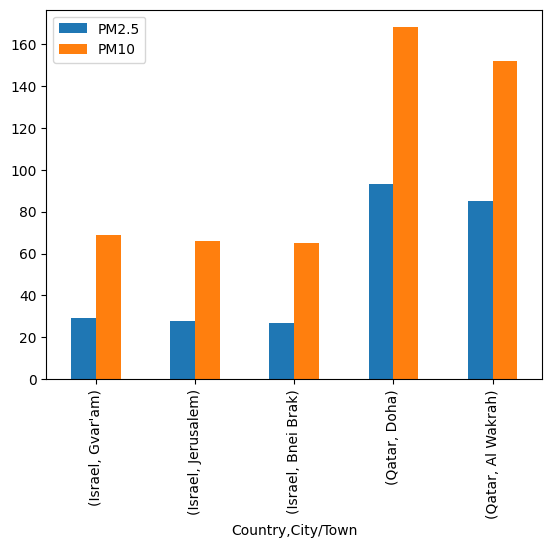

In [54]:
df.loc[['Israel','Qatar']][['PM2.5','PM10']].plot(kind='bar')